In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Hari/Evaluation/Classification/')
print(os.getcwd())
print(os.listdir())
sys.path.append(os.path.abspath("src"))

/content/drive/MyDrive/Hari/Evaluation/Classification
['src', 'results', 'notebooks', 'dataset']


In [ ]:
data_dir = "/content/drive/MyDrive/Hari/Evaluation/Classification/dataset"
from data_ import get_dataloaders
from model import ResNet20
from train import train_model

In [ ]:
from data_ import get_dataloaders

# Paths to NPZ files
train_npz = "/content/drive/MyDrive/Hari/Evaluation/Classification/dataset/train_data.npz"
val_npz = "/content/drive/MyDrive/Hari/Evaluation/Classification/dataset/val_data.npz"

# Get DataLoaders
dataloaders = get_dataloaders(train_npz, val_npz)

# Access train, val, and test loaders
train_loader = dataloaders["train"]
val_loader = dataloaders["val"]
test_loader = dataloaders["test"]

# Check batch
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)  # Expected: (200, 1, 150, 150), (200,)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


torch.Size([200, 1, 150, 150]) torch.Size([200])


In [ ]:
start_time = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet20().to(device)
end_time = time.time()
print(f"Model loaded! Time taken: {end_time - start_time:.2f} sec")

Model loaded! Time taken: 0.27 sec


1.   Increased the depth of the model to 32 layers (6*5 + 2).
2.   Implement a lr scheduler which reduces lr on the basis of how Val loss is changing.
3.   Z Score Normalization implemented.

In [ ]:
epochs = 20
learning_rate = 0.0001 #to start, scheduler will take care later

In [ ]:
train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, device, epochs, learning_rate
)

Training started!
Epoch 1 started


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Processing batch 1
Loss computed for batch 1
Batch 1 updated!
Processing batch 2
Loss computed for batch 2
Batch 2 updated!
Processing batch 3
Loss computed for batch 3
Batch 3 updated!
Processing batch 4
Loss computed for batch 4
Batch 4 updated!
Processing batch 5
Loss computed for batch 5
Batch 5 updated!
Processing batch 6
Loss computed for batch 6
Batch 6 updated!
Processing batch 7
Loss computed for batch 7
Batch 7 updated!
Processing batch 8
Loss computed for batch 8
Batch 8 updated!
Processing batch 9
Loss computed for batch 9
Batch 9 updated!
Processing batch 10
Loss computed for batch 10
Batch 10 updated!
Processing batch 11
Loss computed for batch 11
Batch 11 updated!
Processing batch 12
Loss computed for batch 12
Batch 12 updated!
Processing batch 13
Loss computed for batch 13
Batch 13 updated!
Processing batch 14
Loss computed for batch 14
Batch 14 updated!
Processing batch 15
Loss computed for batch 15
Batch 15 updated!
Processing batch 16
Loss computed for batch 16
Batch

KeyboardInterrupt: 

Extremely bad Val Loss Performance , shot up to 20 times from what it was in last training, also kept increasing for 4 epochs. I suspect Normalization applied did not work, I will trian the model with Normalization taken off this time.

In [ ]:
train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, device, epochs, learning_rate
)

Training started!
Epoch 1 started


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Loss computed for batch 6
Batch 6 updated!
Processing batch 7
Loss computed for batch 7
Batch 7 updated!
Processing batch 8
Loss computed for batch 8
Batch 8 updated!
Processing batch 9
Loss computed for batch 9
Batch 9 updated!
Processing batch 10
Loss computed for batch 10
Batch 10 updated!
Processing batch 11
Loss computed for batch 11
Batch 11 updated!
Processing batch 12
Loss computed for batch 12
Batch 12 updated!
Processing batch 13
Loss computed for batch 13
Batch 13 updated!
Processing batch 14
Loss computed for batch 14
Batch 14 updated!
Processing batch 15
Loss computed for batch 15
Batch 15 updated!
Processing batch 16
Loss computed for batch 16
Batch 16 updated!
Processing batch 17
Loss computed for batch 17
Batch 17 updated!
Processing batch 18
Loss computed for batch 18
Batch 18 updated!
Processing batch 19
Loss computed for batch 19
Batch 19 updated!
Processing batch 20
Loss computed for batch 20
Batch 20 updated!
Proce

Unfotunately , runtime disconnected again within 15 epochs. Though the Loss and Accuracies are stored for all the 15 epochs through the printed statements above and the epoch wise weights are store in "./results."

In [ ]:
print("train_losses : ")
print(train_losses)
print("val_losses : ")
print(val_losses)
print("train_accs : ")
print(train_accs)
print("val_accs : ")
print(val_accs)

In [ ]:
train_l= [1.105463,1.098492,1.097506,1.061194,0.899782,0.695157,0.548972,0.487170,0.456836,0.415062,0.397767,0.384932,0.363495,0.349866,0.3444839]
train_a= [0.337,0.346,0.353,0.409,0.554,0.703,0.781,0.809,0.824,0.841,0.848,0.855,0.861,0.867,0.868]
val_l= [1.098631,1.150630,1.098879,0.989621,1.008072,0.707727,0.655462,0.573110,0.499763,0.408778,0.352594,1.490334,0.385842,0.488209,0.356367]
val_a= [0.348,0.334,0.347,0.480,0.520,0.699,0.728,0.769,0.799,0.841,0.862,0.541,0.861,0.841,0.866]

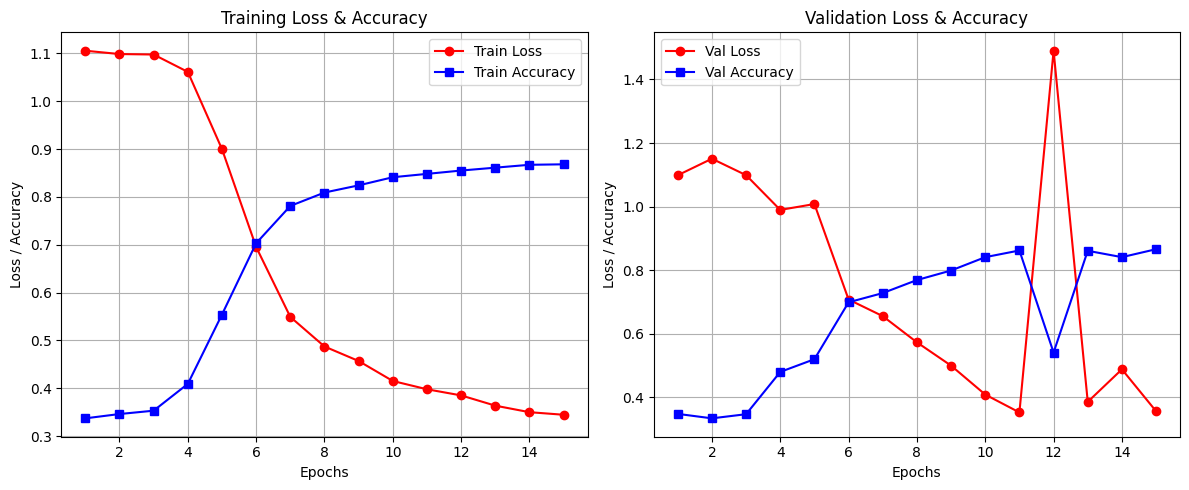

In [ ]:
epochs_ = range(1,len(train_l)+1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_, train_l, label="Train Loss", marker="o", color="red")
plt.plot(epochs_, train_a, label="Train Accuracy", marker="s", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.title("Training Loss & Accuracy")
plt.legend()
plt.grid(True)

# Plot Validation Loss & Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_, val_l, label="Val Loss", marker="o", color="red")
plt.plot(epochs_, val_a, label="Val Accuracy", marker="s", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.title("Validation Loss & Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

TEST SET TO BE RUN ON WEIGHTS STORED AT .results/Train_2.pth , and ROC and AUC analysis needs to be carried out on the same.

Exact Test set lost , since its made off of the Val and Train sets everytime a training spell is run. Making a new test set may not be good for inference since model might have seen some of the imgs there while being trained.

Model weights are however stored at "./results/Train_2.pth" and "./results/Train_2_lowest_val_loss.pth"